In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.0.2'

In [5]:
import pandas as pd
import os

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'base_cleaned.csv')
assert os.path.exists(base_csv_path), f"base {base_csv_path} does not exist"

# Load the data
df = pd.read_csv(base_csv_path)

In [3]:
#Calculate the median in wl_time
median = df['wl_time'].median()

#Print the the median wainting time
print("The median waiting time is: ", median)

#Code wl_time to 0 if it is less than the median, otherwise 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < median else 1)

The median waiting time is:  88.0


In [4]:
df.sample(5)

,thoracic_dgn,num_prev_tx,tah,vas,onvent,icu,inotropic,gender,abo,wgt_kg_tcr,...,prior_card_surg_tcr,histry_cig_old,init_stat,init_age,ethcat,init_hgt_cm_calc,init_wgt_kg_calc,ventilator_tcr,work_income_tcr,wl_time
22646,1.0,0,NaN,NaN,NaN,NaN,NaN,M,2,60.5550,...,N,NaN,1.0,62.0,2,167.64,60.5550,0,N,0
1487,1.0,0,NaN,NaN,NaN,NaN,NaN,M,1,96.0000,...,N,NaN,2.0,60.0,1,180.34,95.7080,0,N,0
62054,1.0,0,NaN,NaN,NaN,NaN,NaN,M,2,96.0000,...,Y,NaN,2.0,59.0,2,187.96,96.0000,0,N,0
49533,1.0,0,NaN,NaN,NaN,NaN,NaN,M,3,95.2543,...,N,NaN,1.0,51.0,1,182.88,95.2543,0,N,1
6061,1.0,0,N,N,N,Y,NaN,M,1,97.0000,...,U,NaN,3.0,32.0,1,190.00,97.0000,0,NaN,1


In [5]:
# import pycaret classification and init setup
from pycaret.classification import *
#Use setup with missforest imputation
best = setup(data = df, target = 'wl_time', imputation_type='iterative')

,Description,Value
0,Session id,6032
1,Target,wl_time
2,Target type,Binary
3,Original data shape,"(65067, 34)"
4,Transformed data shape,"(65067, 44)"
5,Transformed train set shape,"(45546, 44)"
6,Transformed test set shape,"(19521, 44)"
7,Ordinal features,7
8,Numeric features,21
9,Categorical features,12


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7000,0.7664,0.7241,0.6920,0.7077,0.4000,0.4005,2.6940
lightgbm,Light Gradient Boosting Machine,0.6992,0.7669,0.7191,0.6929,0.7057,0.3984,0.3987,1.2960
catboost,CatBoost Classifier,0.6981,0.7652,0.7185,0.6915,0.7047,0.3961,0.3964,10.6140
ada,Ada Boost Classifier,0.6956,0.7607,0.7220,0.6870,0.7040,0.3910,0.3916,1.4880
rf,Random Forest Classifier,0.6917,0.7528,0.7015,0.6892,0.6952,0.3833,0.3834,2.0980
xgboost,Extreme Gradient Boosting,0.6900,0.7544,0.7088,0.6844,0.6963,0.3800,0.3803,2.4690
lr,Logistic Regression,0.6851,0.7453,0.7096,0.6776,0.6932,0.3700,0.3705,13.6810
ridge,Ridge Classifier,0.6851,0.0000,0.7132,0.6765,0.6943,0.3702,0.3707,0.8900
lda,Linear Discriminant Analysis,0.6851,0.7452,0.7132,0.6765,0.6943,0.3702,0.3707,1.1360
et,Extra Trees Classifier,0.6817,0.7417,0.6886,0.6805,0.6845,0.3633,0.3633,2.2370


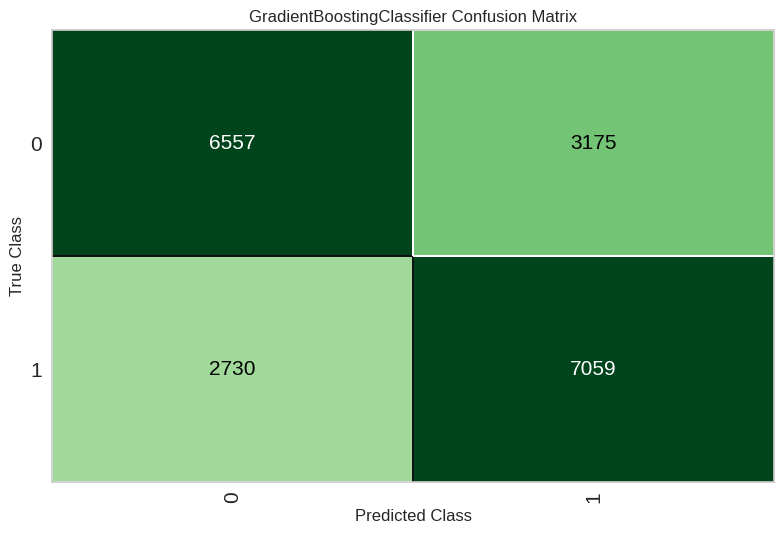

In [7]:
plot_model(best, plot = 'confusion_matrix')

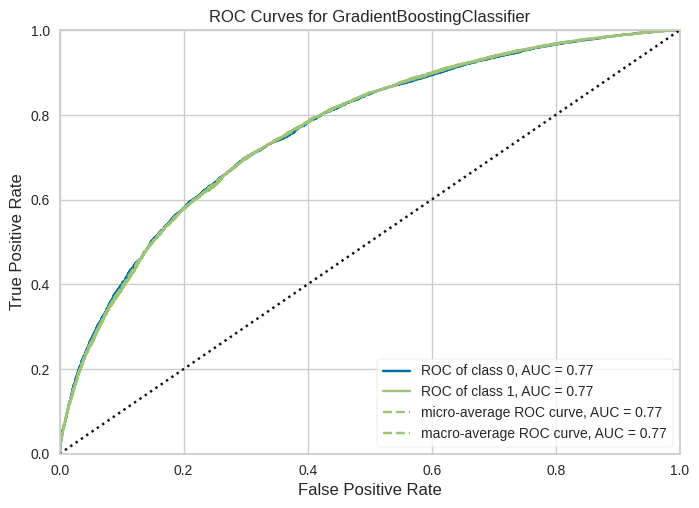

In [8]:
plot_model(best, plot = 'auc')

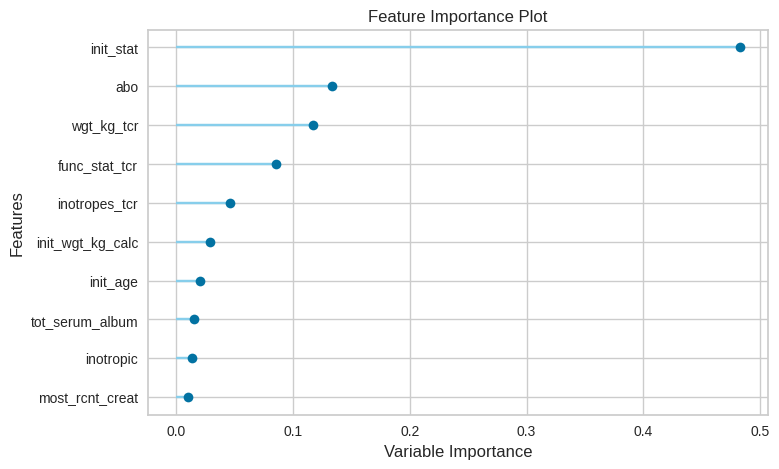

In [9]:
plot_model(best, plot = 'feature')

In [1]:
#Print correlation between wgt_kg_tcr and init_wgt_kg_calc
print(df['wgt_kg_tcr'].corr(df['init_wgt_kg_calc']))

NameError: name 'df' is not defined